In [1]:
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os

c:\ProgramData\anaconda3\envs\ccatholo\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
folder='First_Meas/'
def get_mean_err(samples):
    mean = samples.mean(axis=-1)
    std = np.std(samples, axis=-1)
    sample_N = samples.shape[1]
    err = std / np.sqrt(sample_N-1)
    return mean, err

In [64]:
class champ_optics():
    @staticmethod
    def fn_para(x,a,b,c):
        return a*(x-b)**2+c
    
    @staticmethod
    def load_data(folder):
        sample=[]
        n=0
        for file in os.listdir(folder):
            D=np.genfromtxt(folder+file)[:,1]
            sample.append(D)
        return np.array(sample).T
    
    def __init__(self,folder,dz=0.1,distance=1.4):
        self.distance=distance
        self.sample=self.load_data(folder)
        self.mean,self.err=get_mean_err(self.sample)
        self.err*=1/self.mean[int(self.mean.size/2)]
        self.mean*=1/self.mean[int(self.mean.size/2)]
        self.sample_x=np.linspace(0,self.sample.shape[0]-1,self.sample.shape[0])*dz

    def plot_meas(self,):
        fig, ax = plt.subplots(1,1,figsize=(10,5))
        ax.errorbar(self.sample_x,self.mean,yerr=self.err,capsize=2,fmt="k-*",ecolor="gray",label='Distance:'+str(self.distance))
        plt.xlabel('dz (mm)',fontsize=12)
        plt.ylabel('Normalized power',fontsize=12)
        #plt.ylim([0.8,1.1])
        plt.legend(fontsize=12)


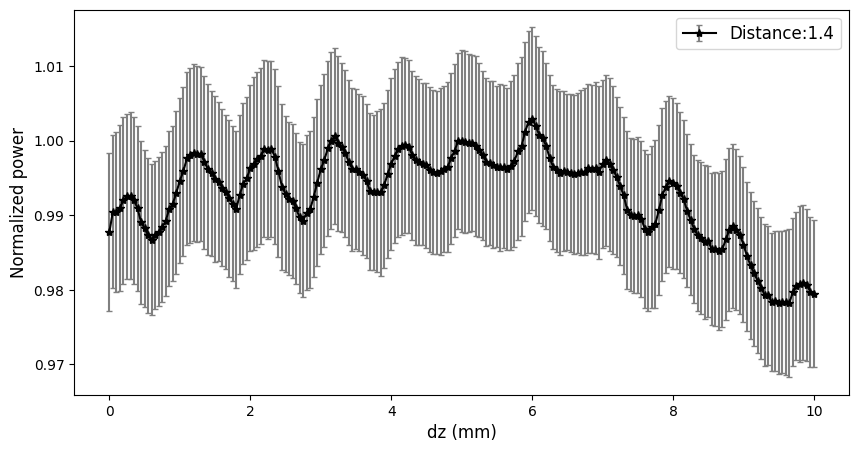

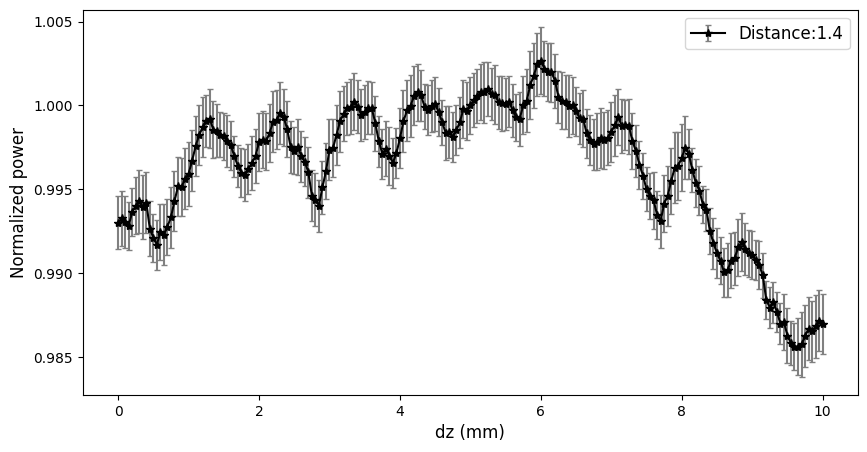

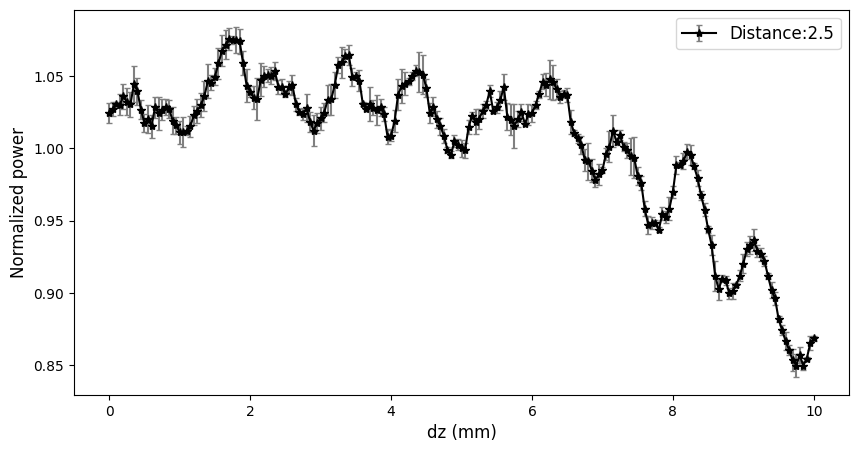

In [65]:
Meas1_0=champ_optics(folder+'1_4m/',dz=0.05,distance=1.4)
Meas1_0.plot_meas()
Meas1=champ_optics(folder+'1_4m_absorb/',dz=0.05,distance=1.4)
Meas1.plot_meas()
Meas2=champ_optics(folder+'2_5m/',dz=0.05,distance=2.5)
Meas2.plot_meas()

In [ ]:
fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder)[:5]:
    if file.startswith('REN_3_21_furthertilted_1_4m_50um_10mm_'):
        data=np.genfromtxt(folder+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        #data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print('X0:',popt[1])

        plt.plot(dz,data2,'-',label=file+'fit')
        DZ+=popt[1]
        #DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=5)
plt.show()

In [ ]:

fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder)[5:]:
    if file.startswith('REN_3_21_furthertilted_1_4m_50um_10mm_8papers'):
        data=np.genfromtxt(folder+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        #data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
        #plt.plot(dz[9:-10],data2,'-',label=file+'filtered')

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print('X0:',popt[1])
        plt.plot(dz,data2,'-',label=file+'fit')
        DZ+=popt[1]
        #DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=5)
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder)[:]:
    if file.startswith('REN_3_21_tilted_1_4m_50um_10mm'):
        data=np.genfromtxt(folder+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        data2=signal.convolve(data[:,1], Filter, mode='valid')
        plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print(popt[1])
        plt.plot(dz,data2,'-',label=file+'fit')

        DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=5)
plt.show()

In [ ]:
filter3=np.ones(40)/40
Filter=filter3
fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder2)[1:]:
    if file.startswith('REN_3_25'):
        data=np.genfromtxt(folder2+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        #data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
        #print(data2.max(),dz[np.where(data2==data2.max())])

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print('X0',popt[1])
        plt.plot(dz,data2,'-',label=file+'fit')


        DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=8)
plt.show()

In [ ]:
4.3-3.03